In [1]:
import pandas as pd
import numpy as np
from math import e
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/ignis/Downloads/zoo_data(For Decision Tree Program).csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ignis/Downloads/zoo_data(For Decision Tree Program).csv'

In [6]:
df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [87]:
columns=['hair',
   'feathers',
   'eggs',
   'milk',
   'airborne',
   'aquatic',
   'predator',
   'toothed',
  'backbone',
  'breathes',
  'venomous',
  'fins',
  'legs',
   'tail',
  'domestic',
 'catsize',
   'type']
df.columns=columns
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [88]:
target=df['type']
df_new=df.drop(['type'],axis=1)
df_new

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
target

0     1
1     4
2     1
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: type, Length: 100, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, target, test_size = 0.33, random_state = 42)

In [91]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
28,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1
93,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
66,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
65,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
71,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
14,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
92,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0


In [92]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
53,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
70,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
45,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
39,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
22,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1
80,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [93]:
y_train

28    1
93    1
5     1
66    1
65    1
     ..
60    4
71    7
14    7
92    1
51    5
Name: type, Length: 67, dtype: int64

In [94]:
y_test

83    1
53    1
70    2
45    7
44    1
39    6
22    2
80    7
10    2
0     1
18    1
30    1
73    1
33    4
90    3
4     1
76    7
77    2
12    7
31    1
55    2
88    5
26    1
42    2
69    1
15    2
40    2
96    6
9     1
72    4
11    4
47    1
85    4
Name: type, dtype: int64

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')

In [96]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [97]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 2, 7, 1, 6, 2, 7, 2, 1, 1, 1, 1, 4, 3, 1, 7, 2, 7, 1, 2, 5,
       1, 2, 1, 2, 2, 6, 1, 4, 4, 1, 4])

In [98]:
format(accuracy_score(y_test, y_pred))

'1.0'

In [99]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  4]]


In [110]:
X_train.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

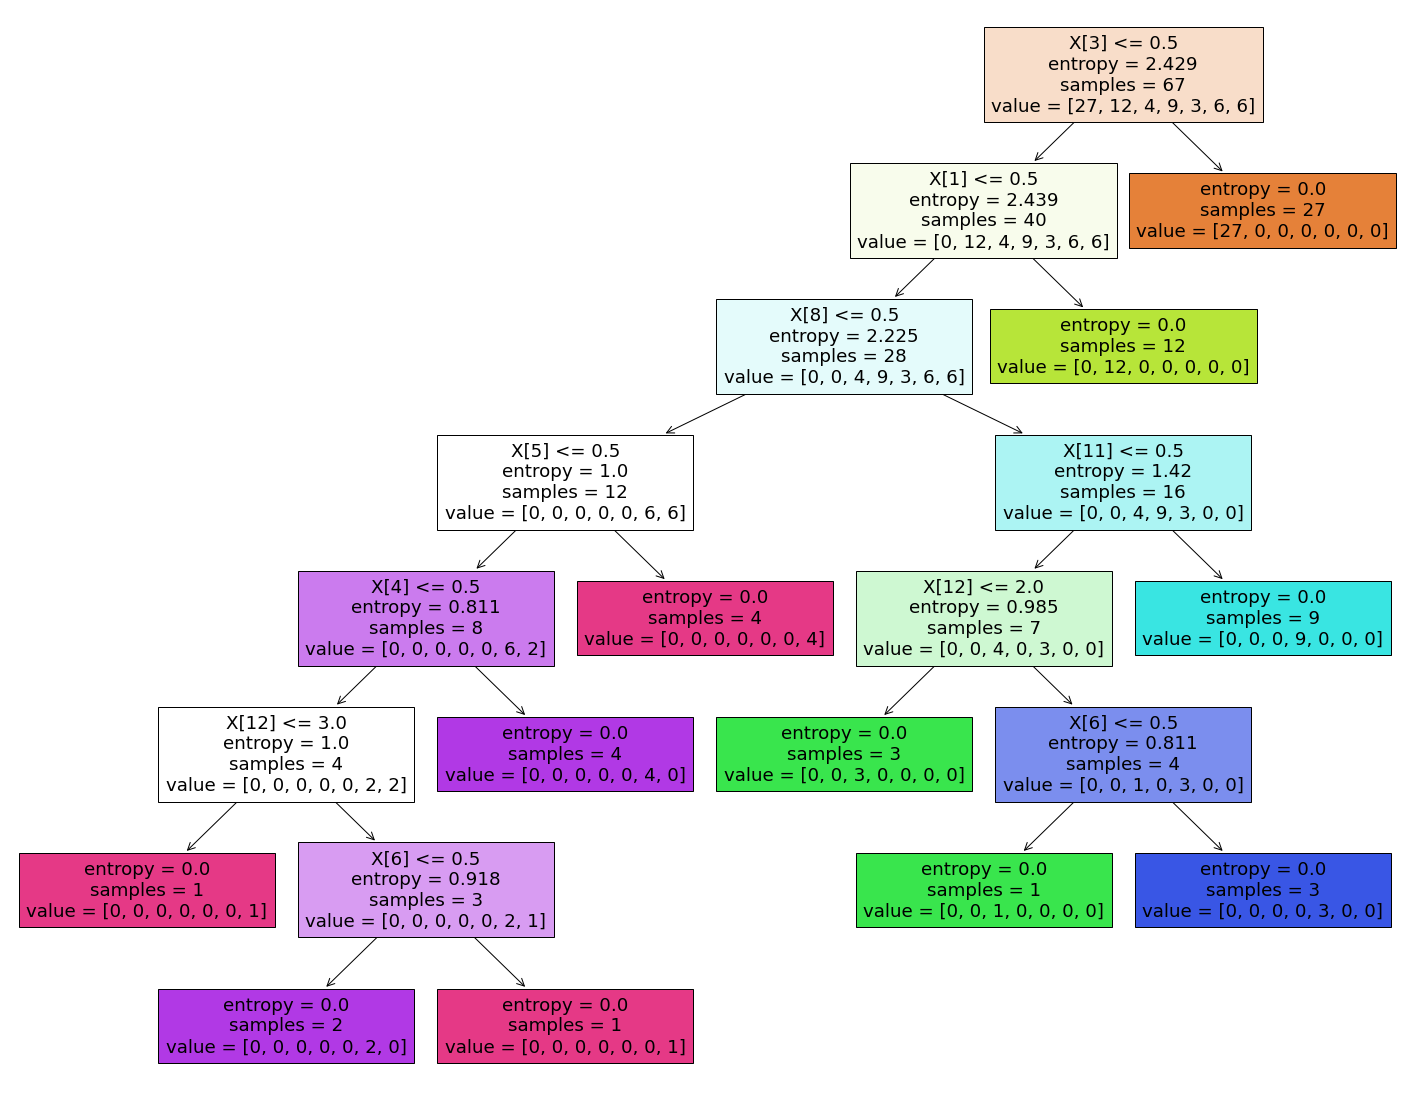

In [116]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

In [111]:
y_train

28    1
93    1
5     1
66    1
65    1
     ..
60    4
71    7
14    7
92    1
51    5
Name: type, Length: 67, dtype: int64